<a href="https://colab.research.google.com/github/Khumayun/ML_F21_A1/blob/master/ML_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime

In [2]:
# Import data, rename 2 columns and inspect head

In [3]:
flight_delay_df = pd.read_csv('flight_delay.csv')
flight_delay_df['departure_airport'] = flight_delay_df['Depature Airport']
flight_delay_df['destination_airport'] = flight_delay_df['Destination Airport']
del flight_delay_df['Destination Airport']
del flight_delay_df['Depature Airport']
flight_delay_df.head()

,Scheduled depature time,Scheduled arrival time,Delay,departure_airport,destination_airport
0,2015-10-27 07:40:00,2015-10-27 20:45:00,0.0,SVO,HAV
1,2015-10-27 09:50:00,2015-10-27 20:35:00,2.0,SVO,JFK
2,2015-10-27 10:45:00,2015-10-27 23:35:00,0.0,SVO,MIA
3,2015-10-27 12:30:00,2015-10-28 01:20:00,0.0,SVO,LAX
4,2015-10-27 14:15:00,2015-10-27 16:40:00,9.0,OTP,SVO


split by date and time then convert to datatime format and add day of week and flight_durartion cols

In [4]:
flight_delay_df[['departure_date', 'departure_time']] = flight_delay_df['Scheduled depature time'].str.split(' ', expand=True)
flight_delay_df['departure_date'] = pd.to_datetime(flight_delay_df['departure_date'])
flight_delay_df['departure_dayofweek'] = flight_delay_df['departure_date'].dt.dayofweek

flight_delay_df[['arrival_date', 'arrival_time']] = flight_delay_df['Scheduled arrival time'].str.split(' ', expand=True)
flight_delay_df['arrival_date'] = pd.to_datetime(flight_delay_df['arrival_date'])
flight_delay_df['arrival_dayofweek'] = flight_delay_df['departure_date'].dt.dayofweek

flight_delay_df['timedate_departure'] = pd.to_datetime(flight_delay_df['Scheduled depature time'])
flight_delay_df['timedate_arrival'] = pd.to_datetime(flight_delay_df['Scheduled arrival time'])
flight_delay_df['flight_duration'] = flight_delay_df['timedate_arrival'] - flight_delay_df['timedate_departure']
flight_delay_df['flight_duration'] = pd.to_numeric(flight_delay_df['flight_duration'] // (6*10**10))

flight_delay_df.head().T

,0,1,2,3,4
Scheduled depature time,2015-10-27 07:40:00,2015-10-27 09:50:00,2015-10-27 10:45:00,2015-10-27 12:30:00,2015-10-27 14:15:00
Scheduled arrival time,2015-10-27 20:45:00,2015-10-27 20:35:00,2015-10-27 23:35:00,2015-10-28 01:20:00,2015-10-27 16:40:00
Delay,0,2,0,0,9
departure_airport,SVO,SVO,SVO,SVO,OTP
destination_airport,HAV,JFK,MIA,LAX,SVO
departure_date,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-27 00:00:00
departure_time,07:40:00,09:50:00,10:45:00,12:30:00,14:15:00
departure_dayofweek,1,1,1,1,1
arrival_date,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-27 00:00:00,2015-10-28 00:00:00,2015-10-27 00:00:00
arrival_time,20:45:00,20:35:00,23:35:00,01:20:00,16:40:00


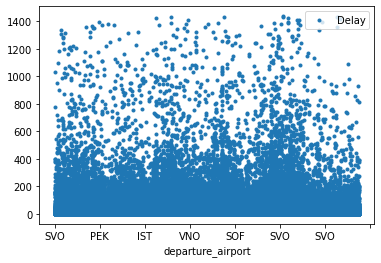

In [5]:
flight_delay_df.plot(x='departure_airport', y='Delay', style='.')

plot minutes vs. delay
plot outlier detection using boxplot
outline detection using z-score

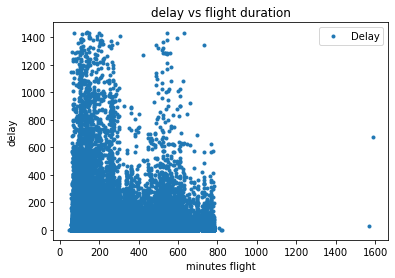

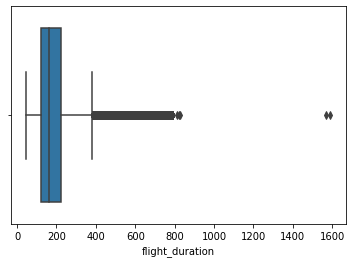

In [6]:
flight_delay_df.plot(x='flight_duration', y='Delay', style='.')
plt.title('delay vs flight duration')
plt.xlabel('minutes flight')
plt.ylabel('delay')
plt.show()
import seaborn as sns
sns.boxplot(x=flight_delay_df['flight_duration'])

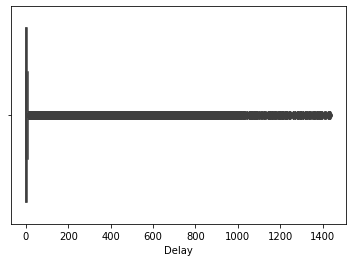

In [7]:

sns.boxplot(x=flight_delay_df['Delay'])

remove outliers using threashold value = 3

In [8]:
from scipy import stats
z = np.abs(stats.zscore(flight_delay_df.loc[:, ['Delay']]))
threshold = 3
flight_delay_df.drop(flight_delay_df.index[np.where(z > threshold)[0]], inplace=True)

In [9]:
z = np.abs(stats.zscore(flight_delay_df.loc[:, ['flight_duration']]))
flight_delay_df.drop(flight_delay_df.index[np.where(z > threshold)[0]], inplace=True)

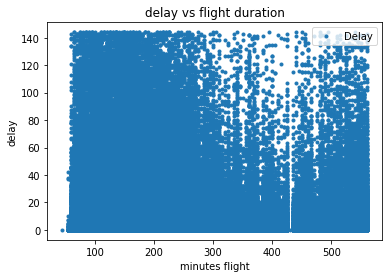

In [10]:
flight_delay_df.plot(x='flight_duration', y='Delay', style='.')
plt.title('delay vs flight duration')
plt.xlabel('minutes flight')
plt.ylabel('delay')
plt.show()

split on train and test

In [11]:
X = flight_delay_df.drop(['Delay', 'Scheduled depature time',
                          'Scheduled arrival time', 'departure_date',
                          'departure_time', 'arrival_date', 'arrival_time',
                          'timedate_departure', 'timedate_arrival'], axis=1)
y = flight_delay_df.loc[:, ['Delay']]
X_train = X.loc[flight_delay_df['departure_date'].dt.year<2018]
y_train = y.loc[flight_delay_df['departure_date'].dt.year<2018]
X_test = X.loc[flight_delay_df['departure_date'].dt.year==2018]
y_test = y.loc[flight_delay_df['departure_date'].dt.year==2018]
X_test

,departure_airport,destination_airport,departure_dayofweek,arrival_dayofweek,flight_duration
499059,ATH,SVO,0,0,250
499060,LHR,SVO,0,0,215
499061,DXB,SVO,0,0,340
499062,TLV,SVO,0,0,250
499063,BEY,SVO,0,0,235
...,...,...,...,...,...
675507,SVO,VOZ,4,4,75
675508,SVO,SVX,4,4,140
675509,LED,SVO,4,4,80
675510,SVO,EGO,4,4,85


In [12]:
regressor = LinearRegression()
x_for_linear_regress = X_train['flight_duration'].values[:, np.newaxis]
y_for_linear_regress = y_train['Delay'].values[:, np.newaxis]

regressor.fit(x_for_linear_regress, y_for_linear_regress)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

x_test_for_linear_regress = X_test.loc[:, ['flight_duration']]
y_pred = regressor.predict(x_test_for_linear_regress)

pd.DataFrame({'Actual': y_test.values[:, 0], 'Predicted': y_pred[:, 0]}, index=[x for x in range(len(y_pred))])

Model intercept : [4.28632133]
Model coefficient : [[0.01499899]]


,Actual,Predicted
0,0.0,8.036069
1,0.0,7.511104
2,0.0,9.385978
3,1.0,8.036069
4,0.0,7.811084
...,...,...
170221,0.0,5.411246
170222,0.0,6.386180
170223,0.0,5.486240
170224,0.0,5.561235


In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R score', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 8.347846694915354
Mean Squared Error: 178.11372236717972
Root Mean Squared Error: 13.345925309516
R score -0.07113407844319952


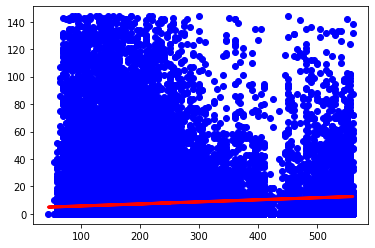

In [14]:
plt.scatter(X_test.loc[:, ['flight_duration']].values, y_test.loc[:, 'Delay'], color='blue')
plt.plot(X_test.loc[:, ['flight_duration']], y_pred, color='red', linewidth=3)
plt.show()

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

encode departure and destination airport cols for x_train and x_test

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data = list(X_train.loc[:, ['departure_airport']].values.ravel())
label_encoder.fit(data)
X_train.loc[:, ['departure_airport']] = label_encoder.transform(X_train.loc[:, ['departure_airport']].values.ravel())

data = list(X_train.loc[:, ['destination_airport']].values.ravel())
label_encoder.fit(data)
X_train.loc[:, ['destination_airport']] = label_encoder.transform(X_train.loc[:, ['destination_airport']].values.ravel())

data = list(X_test.loc[:, ['departure_airport']].values.ravel())
label_encoder.fit(data)
X_test.loc[:, ['departure_airport']] = label_encoder.transform(X_test.loc[:, ['departure_airport']].values.ravel())

data = list(X_test.loc[:, ['destination_airport']].values.ravel())
label_encoder.fit(data)
X_test.loc[:, ['destination_airport']] = label_encoder.transform(X_test.loc[:, ['destination_airport']].values.ravel())


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

y_pred = regressor.predict(X_test)

Model intercept : [3.42129497]
Model coefficients : [[-0.00590683  0.01256019  0.01705326  0.01705326  0.01533516]]


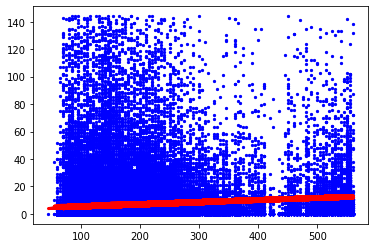

In [19]:
fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
plt.plot(X_test.loc[:, ['flight_duration']], y_pred, color='red', linewidth=3)
plt.scatter(X_test.loc[:, ['flight_duration']].values, y_test.loc[:, 'Delay'], color='blue', marker='.', s=20)
# ax.set_xlabel('Flight duration')
# ax.set_ylabel('Delay')
# ax.set_zlabel('Z Label')
plt.show()

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R score', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 8.301837897144553
Mean Squared Error: 177.54127810294335
Root Mean Squared Error: 13.324461644019369
R score -0.06769153313403531


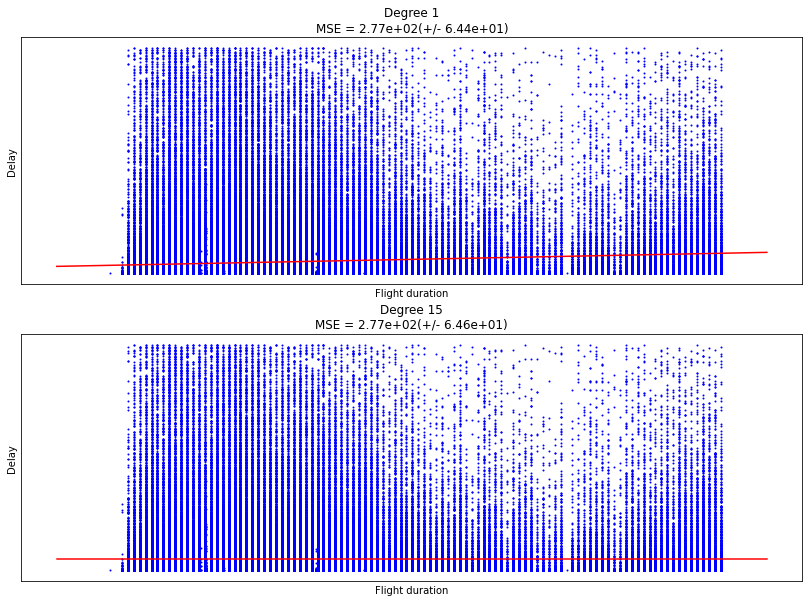

In [21]:
degrees = [1, 15]
plt.figure(figsize=(14, 10))
for i in range(0, len(degrees)):
  ax = plt.subplot(len(degrees), 1, i + 1)
  plt.setp(ax, xticks=(), yticks=())

  poly = PolynomialFeatures(degree=degrees[i])
  train_x_poly = poly.fit_transform(X_train.loc[:, ['flight_duration']])
  clf = LinearRegression()

  test_x_poly = poly.fit_transform(X_test.loc[:, ['flight_duration']])
  train_y_ = clf.fit(train_x_poly, y_train)

  # Evaluate the models using crossvalidation
  scores = cross_val_score(clf, train_x_poly, y_train,
                            scoring="neg_mean_squared_error", cv=10)
  plt.scatter(flight_delay_df['flight_duration'], flight_delay_df['Delay'], color='blue', s=1)
  XX = np.arange(0, 600, 1)
  yy = clf.intercept_ + clf.coef_[0][1]*XX
  for j in range(2, degrees[i]):
    yy += clf.coef_[0][j]*np.power(XX, j)
  plt.plot(XX, yy, '-r')
  plt.xlabel('Flight duration')
  plt.ylabel('Delay')
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
      degrees[i], -scores.mean(), scores.std()))
plt.show()


In [22]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_x_poly, y_train)
lasso_reg.score(train_x_poly, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65923927.24116454, tolerance: 13289870.977328835
  positive)


0.007924362476461666

(288, 2)

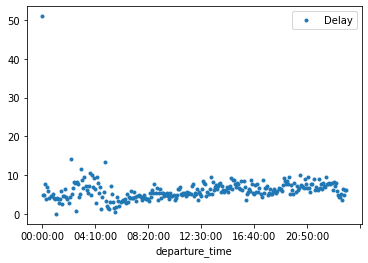

In [23]:
flight_delay_df['month'] = flight_delay_df['departure_date'].dt.month
modified_data = flight_delay_df[['Delay', 'departure_time', 'flight_duration']].groupby(by=['departure_time']).mean()
modified_data.plot(y='Delay', use_index=True, style='.')
modified_data.shape
# flight_delay_df.describe()

POLYNOMIAL REGRESSION FOR modified_data



In [24]:
modified_data['departure_time'] = modified_data.index

In [25]:
#Encode
data = list(modified_data.loc[:, ['departure_time']].values.ravel())
label_encoder.fit(data)
modified_data.loc[:, ['departure_time']] = label_encoder.transform(modified_data.loc[:, ['departure_time']].values.ravel())


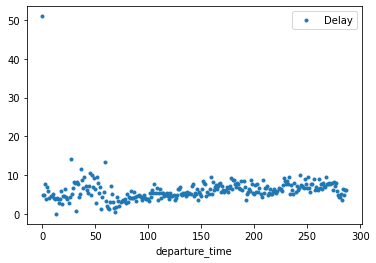

In [26]:
modified_data.plot(y='Delay', x='departure_time', style='.')

In [27]:
modified_X = modified_data.drop('Delay', axis=1)
modified_y = modified_data.loc[:, ['Delay']]
X_train, X_test, y_train, y_test = train_test_split(modified_X, modified_y, test_size=0.2, random_state=431)

[[0.00000000e+00 5.55069927e-03 1.33285215e-05]]
[[ 0.00000000e+00  1.71648026e-02 -4.23041514e-04  3.33964426e-06
  -7.07849371e-09]]
[[ 0.00000000e+00 -2.23758446e-16  7.45471994e-20 -3.45428534e-18
  -3.03361351e-16 -2.08544263e-14 -8.71650527e-13  2.43231929e-14
  -2.05343375e-16  7.01855481e-19 -8.53077138e-22]]


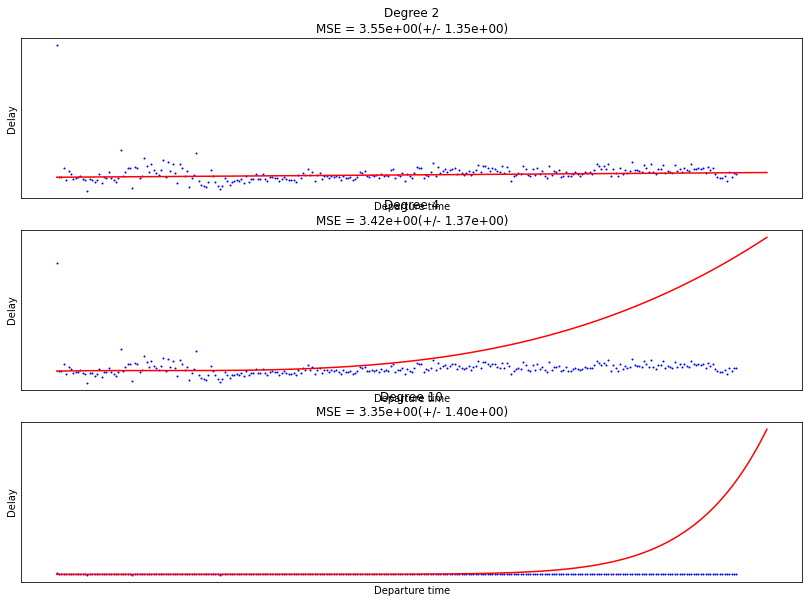

(58, 1)

In [28]:
degrees = [2, 4, 10]
plt.figure(figsize=(14, 10))
for i in range(0, len(degrees)):
  ax = plt.subplot(len(degrees), 1, i + 1)
  plt.setp(ax, xticks=(), yticks=())

  poly = PolynomialFeatures(degree=degrees[i])
  train_x_poly = poly.fit_transform(X_train.loc[:, ['departure_time']])
  clf = LinearRegression()

  test_x_poly = poly.fit_transform(X_test.loc[:, ['departure_time']])
  train_y_ = clf.fit(train_x_poly, y_train)

  # Evaluate the models using crossvalidation
  scores = cross_val_score(clf, train_x_poly, y_train,
                            scoring="neg_mean_squared_error", cv=10)
  plt.scatter(modified_X['departure_time'], modified_y['Delay'], color='blue', s=1)
  XX = np.arange(0, 300, 0.1)
  yy = clf.intercept_ + clf.coef_[0][1]*XX
  print(clf.coef_)
  for j in range(2, degrees[i]):
    yy += clf.coef_[0][j]*np.power(XX, j)
  plt.plot(XX, yy, '-r')
  plt.xlabel('Departure time')
  plt.ylabel('Delay')
  plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
      degrees[i], -scores.mean(), scores.std()))
plt.show()
y_test.shape

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yy))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R score', metrics.r2_score(y_test, y_pred))

ValueError: ignored